# Recomendando Papers - Análisis y Visualización
# Integrantes: Juliana Benitez, Leonardo Latini


Dataset

El dataset está compuesto por metadata de papers subidos a la pagina https://arxiv.org de las categorias Matemática, Física y Computación, entre los años 2017 y 2018. Este dataset cuenta con la metadata de 229448 publicaciones y fue creado utilizando OAI protocol for metadata harvesting (OAI-PMH), que permite acceder a la metadata de los articulos publicados en Arxiv. El dataset esta provisto en formato .csv, separado por ';' (punto y coma).

# Está formado por las siguientes columnas: 

*  Id            [object] : Identificador unico del artículo

* Title         [object] : Título del artículo

* Abstract       [object] : Resumen del artículo

* Fields        [object] : Áreas a las que pertenece el artículo (math, physics or cs).

* Categories     [object] : Categorias o tags de la publicación (para mas referencias ver: https://arxiv.org/, https://arxiv.org/archive/math, https://arxiv.org/corr/subjectclasses

* Authors        [object] : Apellido y nombre de los autores del artículo, separados por coma. 

* Doi           [object] :  (Digital Object Identifier) es una forma de identificar un objeto digital.

* Journal      [object] : Journal donde fue publicado el artículo (En caso que no sea un pre-print).

* Created      [ datetime64[ns] ]: Fecha en que fue subida la primera versión del artículo.

* Year         [int64] : Año en que fue subida la primera versión del artículo.

* Month          [int64] : Mes en que fue subida la primera versión del artículo.

* Day            [int64] : Dia en que fue subida la primera versión del artículo.

* Abstract_Length    [int64] :  Cantidad de caracteres en el abstract.

* Title_Length       [int64] : Cantidad de caracteres en el título.

* Number_Authors     [ int64] : Cantidad de autores.

* Number_Fields [int64] : Número de Áreas.

* Number_Categories [int64]: Número de Categorias.





In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn 
import statistics as stats

In [0]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [59]:
seaborn.__version__

'0.9.0'

In [0]:
seaborn.set_context(context='talk', font_scale=1.2)

In [0]:

#dataset = pandas.read_csv(    '/home/leo/Proyectos/Diplomatura/Mentoria/Dataset/arxiv_dataset.csv',sep=';',dtype={'Id': object})
import pandas as pd
url='https://www.dropbox.com/s/q8am1p40irfrq9c/arxiv_dataset.csv?dl=1'
dataset=pd.read_csv(url,sep=';',dtype={'Id': object},parse_dates=['Created'])

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229448 entries, 0 to 229447
Data columns (total 17 columns):
Id                   229448 non-null object
Title                229448 non-null object
Abstract             229448 non-null object
Fields               229448 non-null object
Categories           229448 non-null object
Authors              229448 non-null object
Doi                  86785 non-null object
Journal              54609 non-null object
Created              229448 non-null datetime64[ns]
Year                 229448 non-null int64
Month                229448 non-null int64
Day                  229448 non-null int64
Abstract_Length      229448 non-null int64
Title_Length         229448 non-null int64
Number_Authors       229448 non-null int64
Number_Fields        229448 non-null int64
Number_Categories    229448 non-null int64
dtypes: datetime64[ns](1), int64(8), object(8)
memory usage: 29.8+ MB


1. Cantidad de papers publicados por dia y por mes. 
Calcular estadisticos como media, moda y mediana

In [63]:
# Calcular media mediana y moda 
dataset['Created'] = dataset['Created'].astype("datetime64")
dataset['Created'].describe()

count                  229448
unique                    727
top       2017-03-15 00:00:00
freq                      539
first     2017-01-01 00:00:00
last      2018-12-28 00:00:00
Name: Created, dtype: object

La funcion o metodo describe() nos muestra basicamente el intervalo temporal en que fueron subidos los papers que componen  todo el set de datos 

In [64]:
dataset['Month'].describe()

count    229448.000000
mean          6.512325
std           3.411553
min           1.000000
25%           4.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Month, dtype: float64

In [68]:
#calculo de la moda de Month
print(stats.mode(dataset['Month']))

5


In [69]:
dataset['Day'].describe()

count    229448.000000
mean         15.795505
std           8.766386
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: Day, dtype: float64

In [71]:
#calculo de la moda de Month
print(stats.mode(dataset['Day']))
print(dataset.groupby(by=['Day'])stats.mode())

SyntaxError: ignored

In [65]:
dataset.groupby(by=['Year','Month','Day']).describe()

Abstract_Length                           ... Number_Categories          
                         count         mean         std  ...               50%  75%  max
Year Month Day                                           ...                            
2017 1     1             119.0   836.142857  424.883758  ...               1.0  2.0  5.0
           2             247.0   974.663968  453.036661  ...               1.0  2.0  5.0
           3             292.0   968.750000  456.732887  ...               1.0  2.0  6.0
           4             282.0   982.783688  459.951730  ...               1.0  2.0  6.0
           5             310.0  1004.341935  436.919526  ...               1.0  2.0  5.0
           6             241.0  1040.294606  436.683505  ...               1.0  2.0  5.0
           7             128.0   958.101562  414.517894  ...               1.0  2.0  5.0
           8             152.0   880.671053  423.423227  ...               1.0  2.0  6.0
           9             341.0   955.137830  421.684788  ...               1.0  2.0  5.0
           10            385.0  1006.197403  425.575704  ...               1.0  2.0  5.0
           11            355.0   956.884507  423.255737  ...               1.0  2.0  6.0
           12            296.0   989.726351  425.495886  ...               1.0  2.0  5.0
           13            291.0  1006.639175  421.944355  ...               1.0  2.0  5.0
           14            110.0   935.672727  385.324648  ...               2.0  2.0  5.0
           15            180.0   885.938889  380.919722  ...               1.0  2.0  5.0
           16            340.0   948.158824  444.582537  ...               1.0  2.0  5.0
           17            385.0   990.955844  435.575237  ...               1.0  2.0  6.0
           18            333.0   990.153153  415.404793  ...               1.0  2.0  5.0
           19            365.0   982.358904  395.926560  ...               1.0  2.0  5.0
           20            285.0   959.112281  433.933192  ...               1.0  2.0  6.0
           21            136.0   952.220588  405.971769  ...               1.0  2.0  5.0
           22            157.0   902.732484  405.852733  ...               1.0  2.0  5.0
           23            421.0   928.344418  413.631153  ...               1.0  2.0  5.0
           24            378.0   984.436508  433.963954  ...               1.0  2.0  5.0
           25            401.0   934.077307  413.738567  ...               1.0  2.0  6.0
           26            344.0   971.476744  411.540418  ...               1.0  2.0  6.0
           27            296.0   911.297297  426.683163  ...               1.0  2.0  5.0
           28            104.0   983.625000  385.486584  ...               1.0  2.0  5.0
           29            133.0   890.150376  385.412048  ...               1.0  2.0  5.0
           30            391.0   959.391304  421.279647  ...               1.0  2.0  6.0
...                        ...          ...         ...  ...               ...  ...  ...
2018 11    29            449.0   982.763920  429.062238  ...               1.0  2.0  6.0
           30            391.0   993.641944  405.426454  ...               1.0  2.0  5.0
     12    1             148.0   954.891892  394.230312  ...               1.0  2.0  4.0
           2             198.0  1011.949495  407.918497  ...               1.0  2.0  5.0
           3             451.0   993.594235  420.495974  ...               1.0  2.0  6.0
           4             400.0   962.617500  399.018289  ...               1.0  2.0  5.0
           5             383.0   961.300261  428.167869  ...               2.0  2.0  6.0
           6             390.0   995.694872  419.654806  ...               1.0  2.0  6.0
           7             294.0   971.428571  406.822835  ...               1.0  2.0  6.0
           8             133.0   900.240602  421.439078  ...               2.0  2.0  5.0
           9             150.0   977.273333  423.592670  ...               1.0  2.0  5.0
          

In [66]:
dataset.groupby(by=['Year','Month']).describe()

Day                                  ... Number_Categories                    
              count       mean       std  min   25%  ...               min  25%  50%  75%  max
Year Month                                           ...                                      
2017 1       8579.0  16.677235  8.746843  1.0  10.0  ...               1.0  1.0  1.0  2.0  6.0
     2       8429.0  14.692490  8.200508  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     3      10432.0  16.069785  9.181993  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     4       8790.0  15.573038  8.420758  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     5      10267.0  15.906691  9.084633  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     6       9657.0  16.030134  8.693269  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     7       9453.0  16.065164  8.633188  1.0   9.0  ...               1.0  1.0  1.0  2.0  7.0
     8       9179.0  16.203617  9.438764  1.0   8.0  ...               1.0  1.0  1.0  2.0  6.0
     9       9866.0  15.882222  8.422986  1.0   8.0  ...               1.0  1.0  1.0  2.0  6.0
     10     10578.0  16.300057  9.019993  1.0   9.0  ...               1.0  1.0  1.0  2.0  7.0
     11     10639.0  15.900931  8.887515  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     12      9686.0  14.886744  8.310388  1.0   7.0  ...               1.0  1.0  1.0  2.0  7.0
2018 1       9296.0  16.543029  8.979786  1.0   9.0  ...               1.0  1.0  1.0  2.0  7.0
     2       9412.0  15.062580  8.167894  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     3      10175.0  15.884423  8.897788  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     4       9856.0  15.719562  8.378180  1.0   9.0  ...               1.0  1.0  1.0  2.0  7.0
     5      10771.0  16.180763  9.058466  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     6       9867.0  15.619439  8.526131  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     7       9699.0  15.969069  8.867222  1.0   9.0  ...               1.0  1.0  1.0  2.0  7.0
     8       8681.0  16.490612  9.303866  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     9       9101.0  15.523569  8.313541  1.0   8.0  ...               1.0  1.0  1.0  2.0  8.0
     10      9801.0  16.036017  9.194277  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     11      9562.0  15.861954  8.944341  1.0   8.0  ...               1.0  1.0  1.0  2.0  7.0
     12      7672.0  13.417753  7.516653  1.0   6.0  ...               1.0  1.0  1.0  2.0  8.0

[24 rows x 48 columns]

In [67]:
dataset['Created'].value_counts()

2017-03-15    539
2017-10-16    531
2017-11-06    517
2017-11-30    509
2017-11-28    507
2017-11-29    507
2017-11-27    506
2017-10-30    506
2017-12-05    501
2017-12-18    498
2017-12-19    495
2018-04-23    492
2017-12-04    487
2018-02-28    486
2018-04-25    483
2018-03-27    480
2018-07-17    480
2017-11-15    479
2017-03-07    477
2018-02-12    477
2017-11-07    476
2018-02-26    476
2017-10-17    476
2017-12-21    473
2018-05-15    471
2017-03-01    470
2017-10-31    468
2018-11-05    467
2017-09-25    467
2017-05-22    466
             ... 
2018-10-06    129
2018-08-18    129
2017-08-27    129
2017-02-04    129
2018-10-20    128
2018-10-27    128
2017-01-07    128
2017-07-08    127
2017-08-26    127
2017-06-24    127
2018-12-15    127
2018-07-07    126
2017-07-15    126
2017-05-13    124
2017-05-06    124
2018-08-19    123
2017-04-08    122
2018-04-07    122
2017-02-18    121
2018-11-10    120
2018-08-04    120
2017-01-01    119
2017-07-29    118
2017-03-25    118
2018-08-11

In [79]:
df=dataset['Day'].value_counts()
print(df.mean())
print(df.median())
print(df.mode())

7401.548387096775
7460.0
0     4578
1     6751
2     7019
3     7072
4     7106
5     7167
6     7221
7     7227
8     7250
9     7272
10    7276
11    7282
12    7302
13    7398
14    7448
15    7460
16    7463
17    7473
18    7563
19    7608
20    7629
21    7706
22    7726
23    7775
24    7844
25    7900
26    7924
27    7934
28    7937
29    8018
30    8119
dtype: int64


In [80]:
df2=dataset['Month'].value_counts()
print(df2.mean())
print(df2.median())
print(df2.mode())

19120.666666666668
19059.5
0     17358
1     17841
2     17860
3     17875
4     18646
5     18967
6     19152
7     19524
8     20201
9     20379
10    20607
11    21038
dtype: int64


In [72]:
dataset.groupby(['Created']).min()

,Id,Title,Abstract,Fields,Categories,Authors,Year,Month,Day,Abstract_Length,Title_Length,Number_Authors,Number_Fields,Number_Categories
Created,,,,,,,,,,,,,,
2017-01-01,1701.00200,"""Dandelion"" Filament Eruption and Coronal Wave...",(2+1) dimensional diffusion equation is consid...,cs,astro-ph.CO,"Ahmed Al Amin Neaz,Haque H. M Fazlul,Rahman Ab...",2017,1,1,116,15,1,1,1
2017-01-02,1701.00316,$\mathbb{Z}^2$-algebras as noncommutative blow...,A branched covering $f: S^2 \to S^2$ is a near...,cs,astro-ph.CO,"Agarwala Adhip,Shenoy Vijay B.",2017,1,2,40,17,1,1,1
2017-01-03,1701.00586,$d_{\ell}(z)$ and BAO in the emergent gravity ...,A bipartite quantum system in a mixed state ca...,cs,astro-ph.CO,"Abowd John,Alvisi Lorenzo,Dwork Cynthia,Kannan...",2017,1,3,141,15,1,1,1
2017-01-04,1701.00897,$N$-soliton formula and blowup result of the W...,"A CW-compatible, pulsed H- superconducting lin...",cs,astro-ph.EP,"Abdalla Hassan,Boettcher Markus",2017,1,4,62,16,1,1,1
2017-01-05,1701.01144,$\Lambda$ is Coming: Parametrizing Freezing Fi...,$\nu$ Eridani is a well known multiperiodic $\...,cs,astro-ph.CO,Agrawal Pranav,2017,1,5,87,20,1,1,1
2017-01-06,1701.01545,$B\to\pi\pi$ Form Factors from Light-Cone Sum ...,3D non-LTE radiative transfer problems are com...,cs,astro-ph.CO,"Abase Ahmed H.,Khafagy Mohamed H.,Omara Fatma A.",2017,1,6,149,18,1,1,1
2017-01-07,1701.01791,$S$-wave resonance contributions to the $B^0_{...,A long standing open problem whether a heat en...,cs,astro-ph.CO,"Agram Nacira,Øksendal Bernt",2017,1,7,187,14,1,1,1
2017-01-08,1701.01916,"""The Capacity of the Relay Channel"": Solution ...",(Abridged) We consider the scientific case for...,cs,astro-ph.EP,"Abhinav Kumar,Choudhury A Ghose,Guha Partha",2017,1,8,73,19,1,1,1
2017-01-09,1701.02064,"$k^{\tau,\epsilon}$-anonymity: Towards Privacy...","A boolean function $f(x_1,...,x_n)$ is \textit...",cs,astro-ph.CO,"Aarts Gert,Seiler Erhard,Sexty Denes,Stamatesc...",2017,1,9,99,19,1,1,1


In [0]:
dataset.groupby(['Created']).describe()

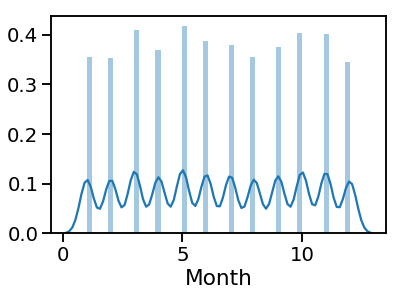

In [0]:
seaborn.distplot(dataset.Month.dropna(axis=0, how='all'))

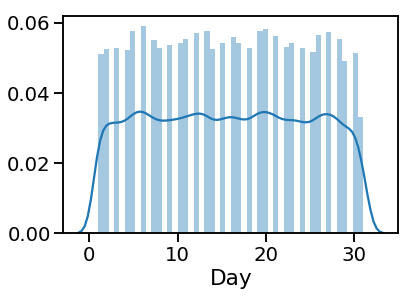

In [0]:
seaborn.distplot(dataset.Day.dropna(axis=0, how='all'))

En lineas generales se aprecia una distribucion practicamente uniforme a lo largo de los meses para los 2 años incluidos en el dataset. 
Las cantidades de papers que se crean mensualmente rondan entre un minimo de 17358 y un maximo de 21038.
Analizando a nivel de dias, vemos que la creacion de papers desde los días 1 al 30 se asemeja a una distribucion uniforme, rondando entre los 6751 y los 8119. Y en los dias 31 disminuye a valores de 4578, lo cuales sonbastante mas bajos que los observados en los restantes dias.


2. Calcular estadísticos como la moda, media, mediana y desviación estándar de las variables 'Title_Length' y 'Number_Authors'. ¿Responden a alguna distribución conocida?¿ Existen outliers?

In [0]:

# calculo de la media de Title_length
print(stats.mean(dataset['Title_Length']))

75.13744290645376


In [0]:
#calculo de la mediana de Title_length
print(stats.median(dataset['Title_Length'])) 

72.0


In [0]:
#calculo de la moda de Title_length
print(stats.mode(dataset['Title_Length'])) 

71


Moda, mediana y media no coinciden en la variable Longitud del titulo, con lo cual para esta variable hay asimetría positiva.

In [0]:
#calculo de la desviación estandar de Title_length
print(stats.pstdev(dataset['Title_Length']))

27.596189325445376


In [0]:
#mismos calculos pero de otra forma mas sencilla, utilizando .describe()
dataset['Title_Length'].describe()

count    229448.000000
mean         75.137443
std          27.596249
min           3.000000
25%          55.000000
50%          72.000000
75%          92.000000
max         280.000000
Name: Title_Length, dtype: float64

In [0]:
# calculo de la media de Number_Authors
print(stats.mean(dataset['Number_Authors']))

4.87321310275095


In [0]:
#calculo de la mediana de Number_Authors
print(stats.median(dataset['Number_Authors'])) 

3.0


In [0]:
#calculo de la moda de Number_Authors
print(stats.mode(dataset['Number_Authors'])) 

2


In [0]:
#calculo de la desviación estandar de Number_Authors
print(stats.pstdev(dataset['Number_Authors']))

25.44529719090448


Lo mismo ocurre para esta variable, Número de autores, donde la distribucion muestra una asimetria positiva

In [0]:
#
dataset['Number_Authors'].describe()

count    229448.000000
mean          4.873213
std          25.445353
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max        1945.000000
Name: Number_Authors, dtype: float64

mismos calculos pero de otra forma mas sencilla, utilizando .describe()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

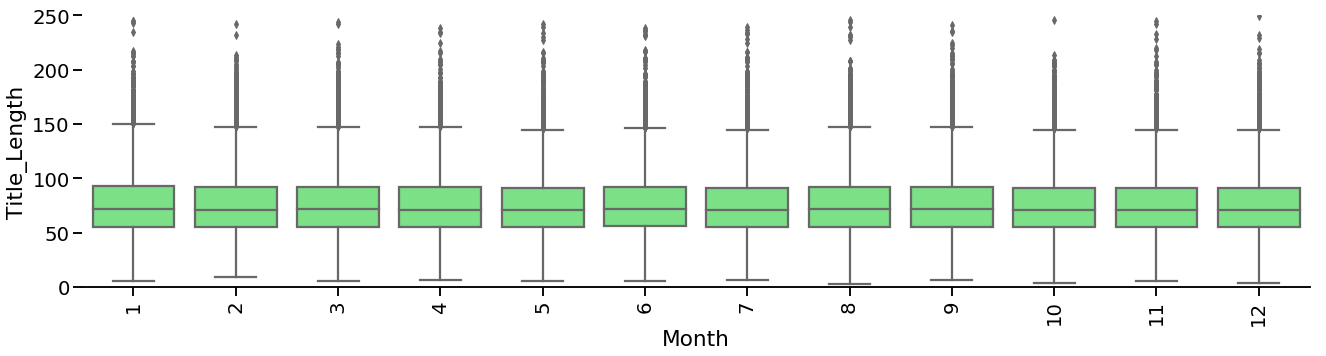

In [0]:

plt.figure(figsize=(22,5))
seaborn.boxplot(data=dataset, x='Month', y='Title_Length',         color=GREEN)
plt.ylabel('Title_Length')
plt.xlabel('Month')
plt.ylim(0, 250)
seaborn.despine(left=True)
plt.xticks(rotation=90)

Con el grafico de boxplot se ve mas claramente la mediana de longitud de titulo y que en todos los meses, los outliers rondan mas o menos los mismos valores

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

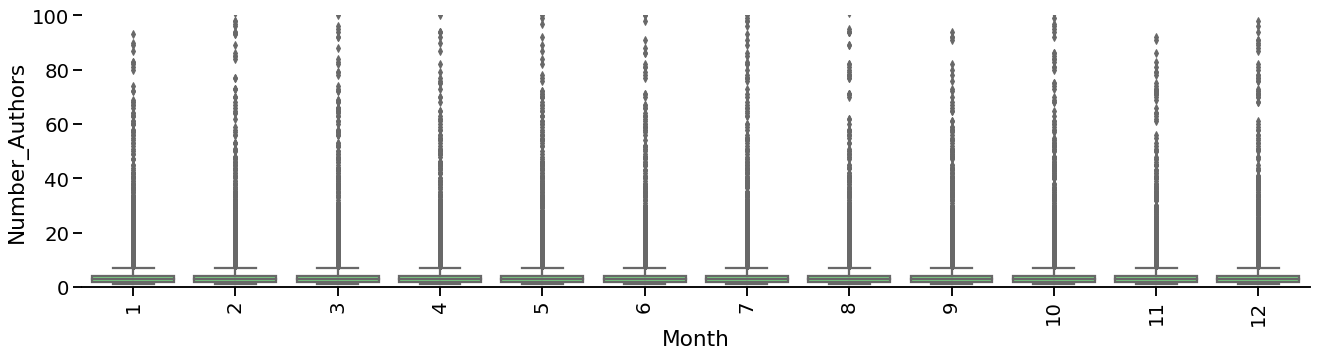

In [0]:
plt.figure(figsize=(22,5))
seaborn.boxplot(data=dataset, x='Month', y='Number_Authors',color=GREEN)
plt.ylabel('Number_Authors')
plt.xlabel('Month')
plt.ylim(0, 100)
seaborn.despine(left=True)
plt.xticks(rotation=90)

La mediana de autores es similar para los meses del año pero hay muchos puntos de outliers

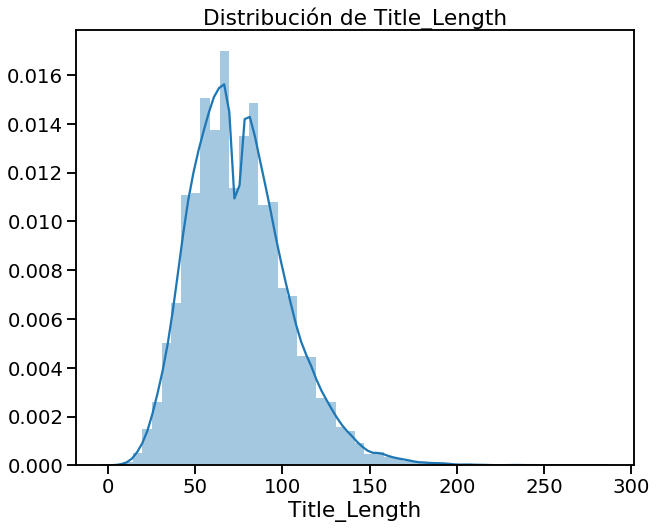

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribución de Title_Length')
seaborn.distplot(dataset.Title_Length.dropna(axis=0, how='all'))

La distribucion de Title Length se asemeja a una bimodal, en un test como shapiro wilk, se confirma que la distribucion no es normal (aunque para volumnes de datos tan grandes como estos el test no es apto para confirmar normalidad)





In [0]:
# normality test
from scipy.stats import shapiro
data=dataset[['Abstract_Length']]
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


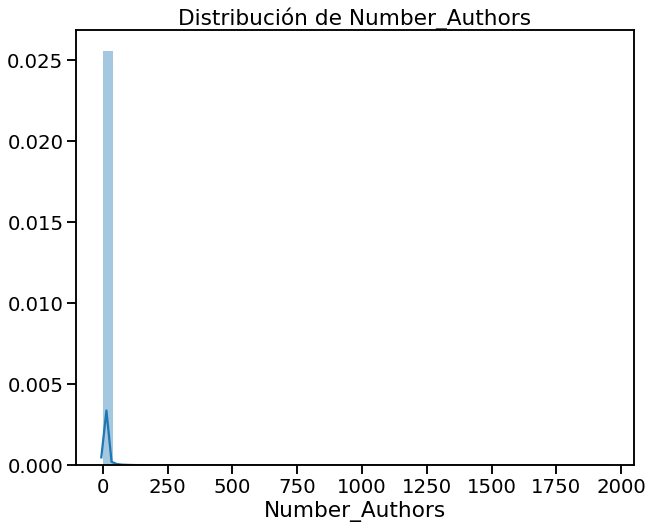

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribución de Number_Authors')
seaborn.distplot(dataset.Number_Authors.dropna(axis=0, how='all'))

En este caso, la distribucion del numero de autores muestra una distribucion muy asimetrica, con alta densidad en un bajo numero de autores pero hay casos de numero total de autores que está en el rango de 200-1950, lo cual puede ser común en estas disciplinas estudiadas pero no en otras ramas de la ciencia. Estos casos de altos numeros de autores , que son estadisticamente outliers, pero observando el set de datos se ve que corresponden a colaboraciones masivas en proyectos por ejemplo del CERN. 

In [0]:
# normality test
from scipy.stats import shapiro
data=dataset[['Title_Length']]
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.974, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(array([0]), <a list of 1 Text xticklabel objects>)

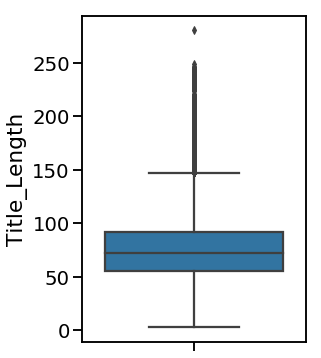

In [0]:
plt.figure(figsize=(4,6))
seaborn.boxplot(data=dataset, y='Title_Length')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

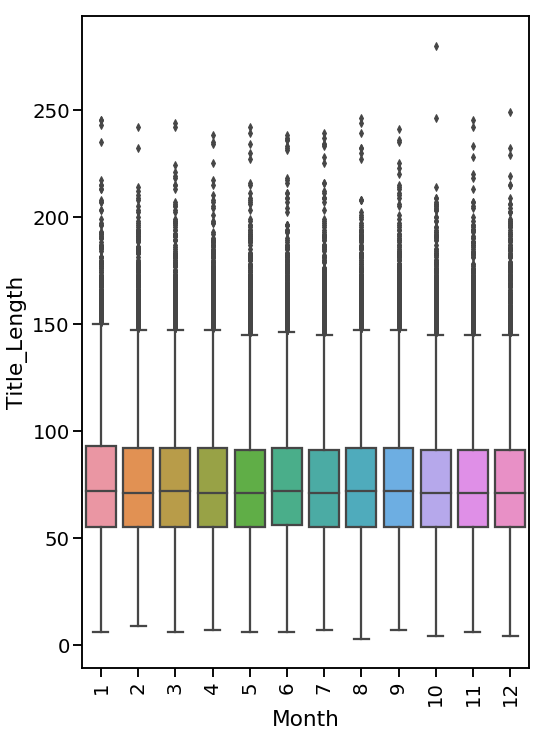

In [0]:
plt.figure(figsize=(8,12))
seaborn.boxplot(data=dataset, x='Month', y='Title_Length')
plt.xticks(rotation=90)

(array([0]), <a list of 1 Text xticklabel objects>)

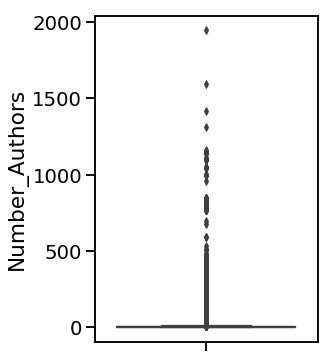

In [0]:
plt.figure(figsize=(4,6))
seaborn.boxplot(data=dataset, y='Number_Authors')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

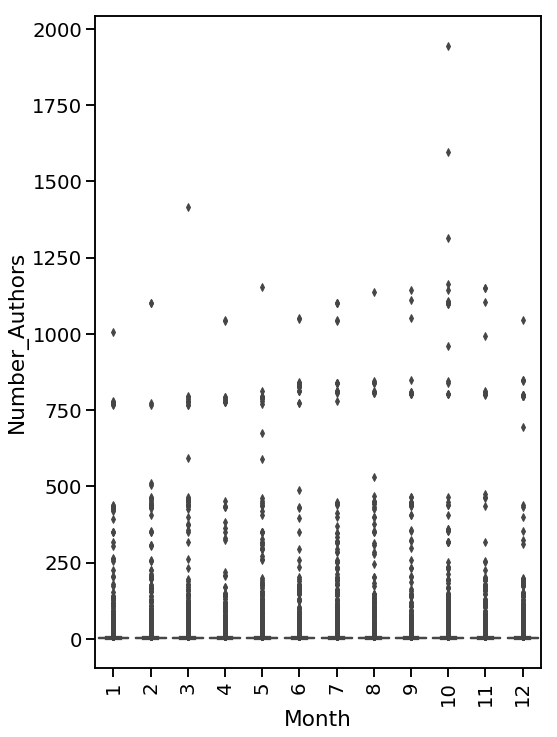

In [0]:
plt.figure(figsize=(8,12))
seaborn.boxplot(data=dataset, x='Month', y='Number_Authors')
plt.xticks(rotation=90)

La longitud de los los titulos de los papers tiene un rango de 277, que va desde longitud 3 hasta longitud 280. Presenta un longitud promedio de 75.137443 y la longitud que mas se repite es la longitud de 71.
Segùn se muestra graficamente se observan outliers en esta variable.
De todos modos, los outliers de longitud en cada uno de los meses son similares. El numero de autores de los papers nos presenta un promedio de 4.8732 siendo 2 la cantidad de autores que mas se repite.

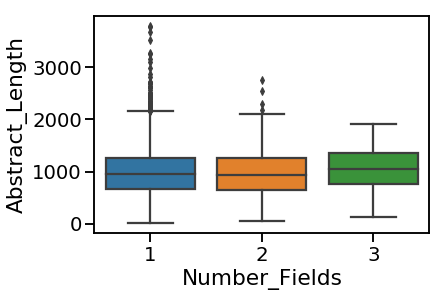

In [0]:
import seaborn as sns
sns.boxplot( x=dataset["Number_Fields"], y=dataset["Abstract_Length"] )

En este grafico se aprecia que en las tres disciplinas, la mediana de longitud del abstract (cuantificada como numero de caracteres) es similar, y esto nos sugiere qu ese relaciona con las condiciones o guias que las revistas indican para el formato para la publicacion del articulo

# 3.
Dividan en 4 partes el dataset y vayan calculando bayes con respecto a 2 variables aleatorias, usando los resultados de cada iteración / partición para calcular. El objetivo es simular que los datos que van llegando en cada iteración recalculan la probabilidad.

In [0]:
from scipy import stats
#
#estas variables aleatorias son la media y el desvio estandar del numero de autores
#
dataset1 = numpy.random.normal(4.873213, 25.445353, size=int(dataset.shape[0]/4)) 
print(int(dataset1.shape[0]/4))
loc, scale= stats.norm.fit(dataset1)
print('media', loc, ' - ds ', scale)

n= stats.norm(loc = loc, scale = scale)
n.rvs(4)

14340
media 4.727762253279168  - ds  25.485537810527195


array([ 17.90590857, -35.24792936,   6.44041158, -14.76086791])

#4.
Análisis de cuales son las variables mas correlacionadas. (Considerar solo las variables numéricas)



Creamos subset de las variables estrictamente numéricas ( aunque incluyan por separado a los componentes del elemento Created (fechas en formato datetime64))

In [0]:
important_cols =dataset[['Year','Month','Day','Abstract_Length','Title_Length','Number_Authors','Number_Fields','Number_Categories']] 
imp_cols2=dataset[['Authors','Abstract_Length','Title_Length','Number_Authors','Number_Fields']] 

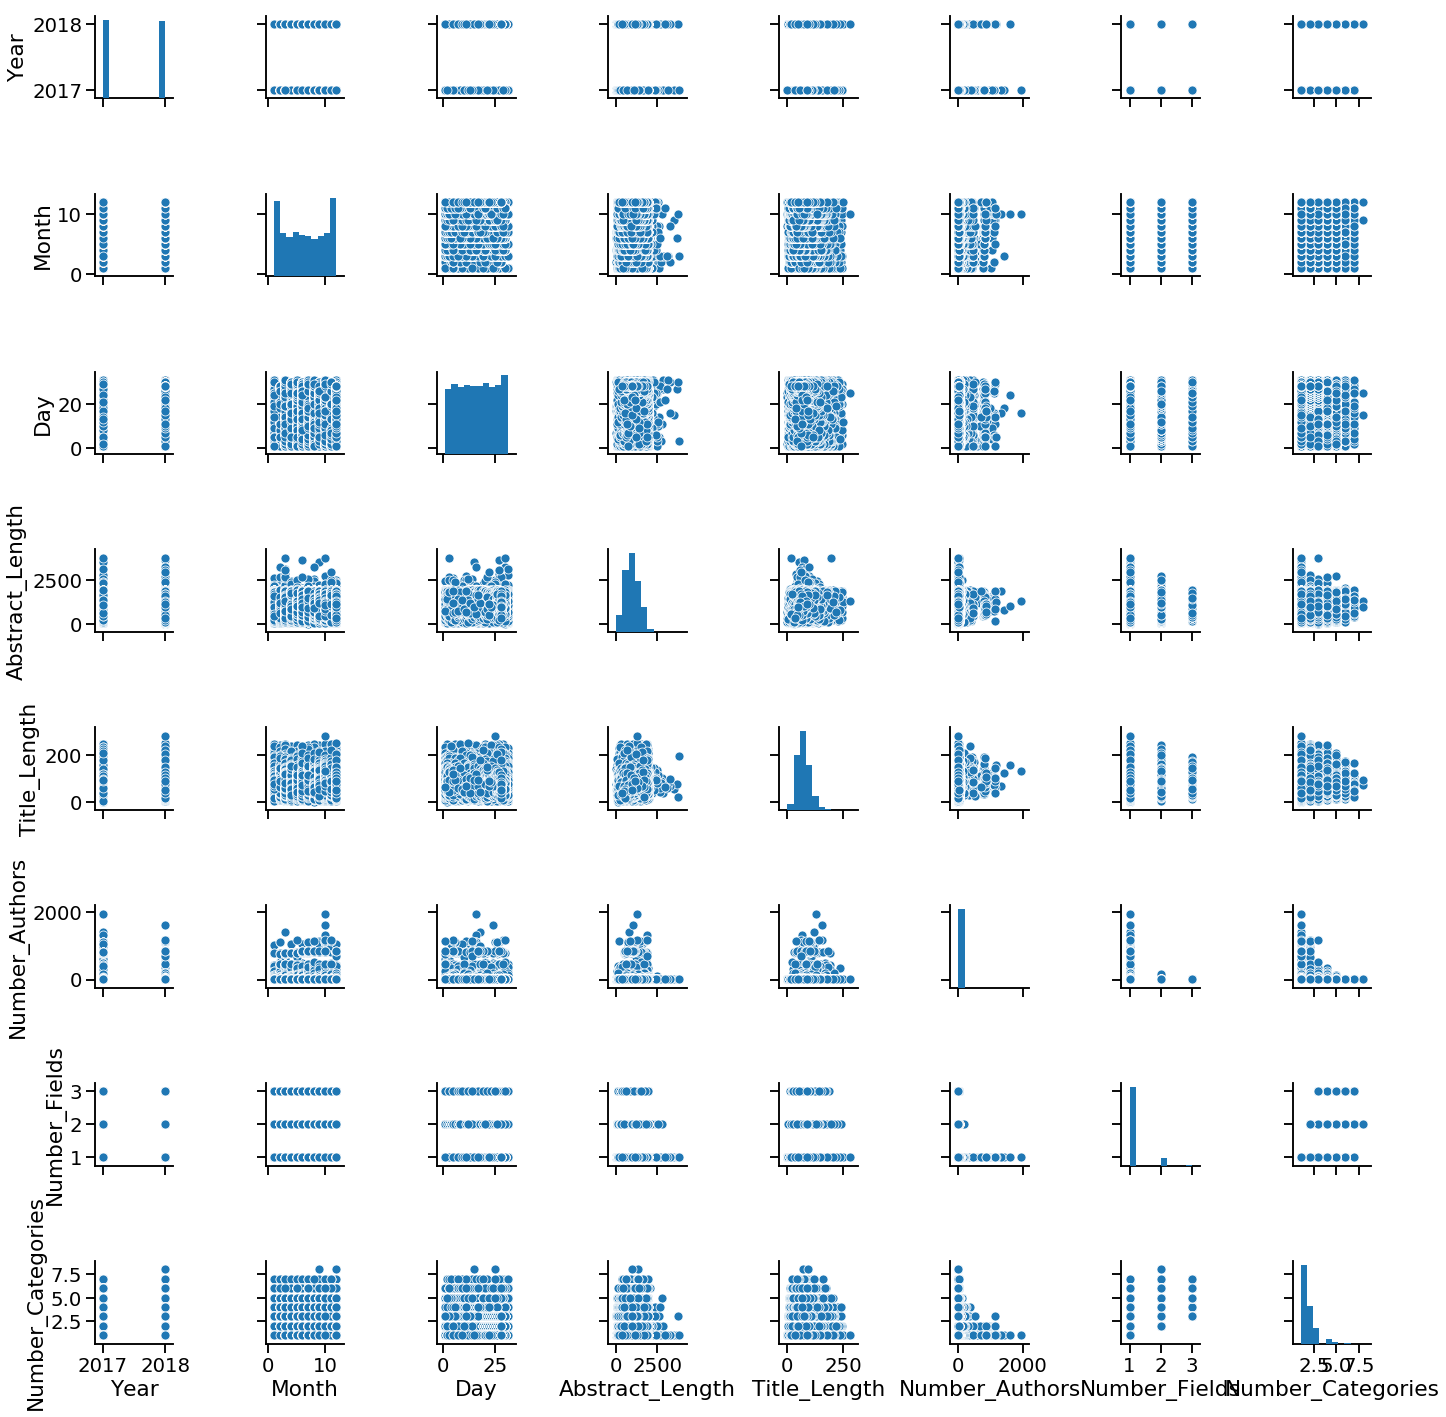

In [0]:
seaborn.pairplot(
    data=important_cols,
           markers='o')

In [0]:
outliers = imp_cols2[imp_cols2['Number_Authors'] > imp_cols2['Number_Authors'].mean() + 3 * imp_cols2['Number_Authors'].std()]
print(outliers)

Utilizando la funcion pairplot para explorar los datos que son variables numéricas puede observarse:


*   Para los dos años registrados en la base de datos el número de papers subidos al sitio es muy similares (en ambos el número de artículos es superior a 110000)
*   Entre el grafico que genera pairplot y el histograma hay una discrepancia; en el pairplot muestra los mayores valores en mes 1 y 12 (enero y diciembre respectivamente), cuando en el histograma la cantidad de archivos subido  no varía tanto de mes a mes ( aunque si se nota que marzo y mayo tiene mayores valores que otros meses)
* Hay casos de números de autores altos, de más de 200 autores, incluso hay uno de 1945 autores.
*   Dado que solo hay tres posibles campos (Matemática, Física y Ciencia de la Computación), las relaciones con otras variables no parecen ser en ningún caso informativas
*  Abstract length y title length podrían llegar a tener una distribución normal


Diferentes maneras de observar el tema de las correlaciones

In [0]:
corr = important_cols.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Month,Day,Abstract_Length,Title_Length,Number_Authors,Number_Fields,Number_Categories
Year,1,-0.0410763,-0.00734567,0.0192596,0.00573531,-0.00607989,-0.0153083,0.013934
Month,-0.0410763,1,-0.0178859,-0.000688231,-0.00507148,0.00201909,-0.0152933,0.00793939
Day,-0.00734567,-0.0178859,1,-0.00287909,-0.00476983,-0.00217966,0.000102479,0.00407856
Abstract_Length,0.0192596,-0.000688231,-0.00287909,1,0.21648,0.0430795,-0.00116475,0.0435823
Title_Length,0.00573531,-0.00507148,-0.00476983,0.21648,1,0.0556969,-0.0239659,-0.034807
Number_Authors,-0.00607989,0.00201909,-0.00217966,0.0430795,0.0556969,1,-0.0256061,-0.0191926
Number_Fields,-0.0153083,-0.0152933,0.000102479,-0.00116475,-0.0239659,-0.0256061,1,0.454287
Number_Categories,0.013934,0.00793939,0.00407856,0.0435823,-0.034807,-0.0191926,0.454287,1


con esta matriz  se ve mejor las correlaciones :  principalmente entre las variables **Abstract_Length** - **Title_Length**
y **Number_Categories**-**Number_Fields**. Probablemente estas correlaciones se hacen con Pearson; creemos que seria mas correcto usar correlaciones no parametricas como Spearman

In [0]:
## calculate spearman's correlation
from scipy import stats
coef, p = stats.spearmanr(important_cols['Abstract_Length'].dropna(), important_cols['Title_Length'].dropna())
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.216
Samples are correlated (reject H0) p=0.000


In [0]:
## calculate spearman's correlation
from scipy import stats
coef, p = stats.spearmanr(important_cols['Number_Authors'].dropna(), important_cols['Title_Length'].dropna())
print('spearman correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

spearman correlation coefficient: 0.168
Samples are correlated (reject H0) p=0.000


In [0]:
## calculate spearman's correlation
from scipy import stats
coef, p = stats.spearmanr(important_cols['Number_Fields'].dropna(), important_cols['Number_Categories'].dropna())
print('spearman correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

spearman correlation coefficient: 0.418
Samples are correlated (reject H0) p=0.000


In [0]:
## calculate spearman's correlation
from scipy import stats
coef, p = stats.kendalltau(important_cols['Number_Fields'].dropna(), important_cols['Number_Categories'].dropna())
print('spearman correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

spearman correlation coefficient: 0.397
Samples are correlated (reject H0) p=0.000


Test de Normalidad para las variables  **Abstract_Length** y  **Title_Length**

In [0]:
# normality test
from scipy.stats import shapiro
data=dataset[['Abstract_Length']]
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [0]:
# normality test
from scipy.stats import shapiro
data=dataset[['Title_Length']]
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.974, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Correlacion a nivel visualizacion de las variables **Number_Fields** y **Number_Categories**

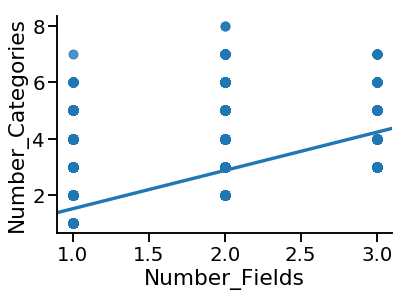

In [0]:
import seaborn as sns
seaborn.regplot(data=important_cols,
                x='Number_Fields', y='Number_Categories',
                marker='o')

seaborn.despine()

Dadas las caracteristicas de las variables número de categorias y número de campos de estudio, que son  valores numericos enteros, el grafico y la correlacion puede indicarse como significativa aunque no es suficientemente informativo o relevante.


# 5.
Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo 'Number_fields' y ' Number_Categories'. Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 

data_crosstab = pd.crosstab(important_cols['Number_Fields'], 
							important_cols['Number_Categories'], 
								margins = True) 
print(data_crosstab) 

Number_Categories       1      2      3     4     5    6   7  8     All
Number_Fields                                                          
1                  130897  53152  18489  4506   915   27   1  0  207987
2                       0   9425   6377  3374  1351  301  30  2   20860
3                       0      0    262   166   126   36  11  0     601
All                130897  62577  25128  8046  2392  364  42  2  229448


In [0]:
# Create function that returns probability percent rounded to one decimal place
def event_probability(event_outcomes, sample_space):
    probability = (event_outcomes / sample_space) 
    return round(probability, 4)

probabilidades marginales

para la variable categoria

In [85]:
# Sample Space
sp= 229448

# Determine the probability of belonging to one category
one_cat=130897
one_cat_probability = event_probability(one_cat, sp)

# Determine the probability of belonging to two Categories
two_cat=62577
two_cat_probability = event_probability(two_cat, sp)

# Determine the probability of belonging to three Categories
three_cat=25128
three_cat_probability = event_probability(three_cat, sp)

# Determine the probability of belonging to four Categories
four_cat=8046
four_cat_probability = event_probability(four_cat, sp)

# Determine the probability of belonging to five Categories
five_cat=2392
five_cat_probability = event_probability(five_cat, sp)

# Determine the probability of belonging to six Categories
six_cat=364
six_cat_probability = event_probability(six_cat, sp)

# Determine the probability of belonging to seven Categories
seven_cat=42
seven_cat_probability = event_probability(seven_cat, sp)


# Determine the probability of belonging to eight Categories
eight_cat=2
eight_cat_probability = event_probability(eight_cat, sp)



# Print each probability
print ("probabilidad de pertenecer a una categoría= ", one_cat_probability)
print ("probabilidad de pertenecer a dos categorías= ",two_cat_probability)
print ("probabilidad de pertenecer a tres categorías= ",three_cat_probability)
print ("probabilidad de pertenecer a cuatro categorías= ",four_cat_probability)
print ("probabilidad de pertenecer a cinco categorías= ",five_cat_probability)
print ("probabilidad de pertenecer a seis categorías= ",six_cat_probability)
print ("probabilidad de pertenecer a siete categorías= ",seven_cat_probability)
print ("probabilidad de pertenecer a ocho categorías= ",eight_cat_probability)


probabilidad de pertenecer a una categoría=  0.5705
probabilidad de pertenecer a dos categorías=  0.2727
probabilidad de pertenecer a tres categorías=  0.1095
probabilidad de pertenecer a cuatro categorías=  0.0351
probabilidad de pertenecer a cinco categorías=  0.0104
probabilidad de pertenecer a seis categorías=  0.0016
probabilidad de pertenecer a siete categorías=  0.0002
probabilidad de pertenecer a ocho categorías=  0.0


probabilidad marginal para la variable Number_Fields

In [87]:

#
# Sample Space
sp= 229448

# Determine the probability of belonging to one field
one_field=207987
one_field_probability = event_probability(one_field, sp)


# Determine the probability of belonging to two field
two_field=20860
two_field_probability = event_probability(two_field, sp)

# Determine the probability of belonging to two field
three_field=601
three_field_probability = event_probability(three_field, sp)


# Print each probability
print ("probabilidad de pertenecer a un campo de estudio= ", one_field_probability)
print ("probabilidad de pertenecer a dos campos de estudio= ", two_field_probability)
print ("probabilidad de pertenecer a tres campos de estudio= ", three_field_probability)


probabilidad de pertenecer a un campo de estudio=  0.9065
probabilidad de pertenecer a dos campos de estudio=  0.0909
probabilidad de pertenecer a tres campos de estudio=  0.0026


Probabiliades conjuntas


In [89]:
# pertenece a 1 campo y con una categoria

sp= 229448

# pertenece a 1 campo y con una categoria
one_field_one_cat=130897
one_field_one_cat_probability = event_probability(one_field_one_cat, sp)



# pertenece a 1 campo y con dos categorias
one_field_two_cat=53152  
one_field_two_cat_probability = event_probability(one_field_two_cat, sp)

# pertenece a 1 campo y con tres categorias
one_field_three_cat=18489
one_field_three_cat_probability = event_probability(one_field_three_cat, sp)
# pertenece a 1 campo y con cuatro categorias
one_field_four_cat=4506
one_field_four_cat_probability = event_probability(one_field_four_cat, sp)
# pertenece a 1 campo y con cinco categorias
one_field_five_cat=915
one_field_five_cat_probability = event_probability(one_field_five_cat, sp)

# pertenece a 1 campo y con seis categorias
one_field_six_cat=27
one_field_six_cat_probability = event_probability(one_field_six_cat, sp)

# pertenece a 1 campo y con siete categorias

one_field_seven_cat=1
one_field_seven_cat_probability = event_probability(one_field_seven_cat, sp)
# pertenece a 1 campo y con ocho categorias

one_field_eight_cat=0
one_field_eight_cat_probability = event_probability(one_field_eight_cat, sp)

# Print each probability


print ("probabilidad de pertenecer a un campo de estudio y una categoría= ", one_field_one_cat_probability)
print ("probabilidad de pertenecer a un campo de estudio y dos categorías= ", one_field_two_cat_probability)
print ("probabilidad de pertenecer a un campo de estudio y tres categorías= ", one_field_three_cat_probability)
print ("probabilidad de pertenecer a un campo de estudio y cuatro categorías= ", one_field_four_cat_probability)
print ("probabilidad de pertenecer a un campo de estudio y cinco categorías= ", one_field_five_cat_probability)
print ("probabilidad de pertenecer a un campo de estudio y seis categorías= ", one_field_six_cat_probability)
print ("probabilidad de pertenecer a un campo de estudio y siete categorías= ", one_field_seven_cat_probability)
print("probabilidad de pertenecer a un campo de estudio y ocho categorías= ", one_field_eight_cat_probability)

  



probabilidad de pertenecer a un campo de estudio y una categoría=  0.5705
probabilidad de pertenecer a un campo de estudio y dos categorías=  0.2317
probabilidad de pertenecer a un campo de estudio y tres categorías=  0.0806
probabilidad de pertenecer a un campo de estudio y cuatro categorías=  0.0196
probabilidad de pertenecer a un campo de estudio y cinco categorías=  0.004
probabilidad de pertenecer a un campo de estudio y seis categorías=  0.0001
probabilidad de pertenecer a un campo de estudio y siete categorías=  0.0
probabilidad de pertenecer a un campo de estudio y ocho categorías=  0.0


In [91]:
sp= 229448
# pertenece a 2 campos y con una categoria
two_field_one_cat= 0
two_field_one_cat_probability = event_probability(two_field_one_cat, sp)



# pertenece a 2 campos y con dos categorias
two_field_two_cat= 9425
two_field_two_cat_probability = event_probability(two_field_two_cat, sp)

# pertenece a 2 campos y con tres categorias

two_field_three_cat= 6377
two_field_three_cat_probability = event_probability(two_field_three_cat, sp)
# pertenece a 2 campos y con cuatro categorias

two_field_four_cat= 3374
two_field_four_cat_probability = event_probability(two_field_four_cat, sp)
# pertenece a 2 campos y con cinco categorias
two_field_five_cat=  1351
two_field_five_cat_probability = event_probability(two_field_five_cat, sp)
  
# pertenece a 2 campos y con seis categorias

two_field_six_cat=  301
two_field_six_cat_probability = event_probability(two_field_six_cat, sp)
# pertenece a 2 campos y con siete categorias

two_field_seven_cat=  30
two_field_seven_cat_probability = event_probability(two_field_seven_cat, sp)
# pertenece a 2 campos y con ocho categorias

two_field_eight_cat=  30
two_field_eight_cat_probability = event_probability(two_field_eight_cat, sp)




print ("probabilidad de pertenecer a dos campos de estudio y una categoría= ", two_field_one_cat_probability)
print ("probabilidad de pertenecer a dos camposo de estudio y dos categorías= ", two_field_two_cat_probability)
print ("probabilidad de pertenecer a dos campos de estudio y tres categorías= ", two_field_three_cat_probability)
print ("probabilidad de pertenecer a dos campos de estudio y cuatro categorías= ", two_field_four_cat_probability)
print ("probabilidad de pertenecer a dos campos de estudio y cinco categorías= ", two_field_five_cat_probability)
print ("probabilidad de pertenecer a dos campos de estudio y seis categorías= ", two_field_six_cat_probability)
print ("probabilidad de pertenecer a dos campos de estudio y siete categorías= ", two_field_seven_cat_probability)
print("probabilidad de pertenecer a dos campos de estudio y ocho categorías= ",two_field_eight_cat_probability)



probabilidad de pertenecer a dos campos de estudio y una categoría=  0.0
probabilidad de pertenecer a dos camposo de estudio y dos categorías=  0.0411
probabilidad de pertenecer a dos campos de estudio y tres categorías=  0.0278
probabilidad de pertenecer a dos campos de estudio y cuatro categorías=  0.0147
probabilidad de pertenecer a dos campos de estudio y cinco categorías=  0.0059
probabilidad de pertenecer a dos campos de estudio y seis categorías=  0.0013
probabilidad de pertenecer a dos campos de estudio y siete categorías=  0.0001
probabilidad de pertenecer a dos campos de estudio y ocho categorías=  0.0001


In [95]:
# pertenece a 3 campos y con una categoria
 sp= 229448
three_field_one_cat= 0
three_field_one_cat_probability = event_probability(three_field_one_cat, sp)
# pertenece a 3 campos y con dos categorias


three_field_two_cat= 0
three_field_two_cat_probability = event_probability(three_field_two_cat, sp)
# pertenece a 3 campos y con tres categorias

three_field_three_cat= 262
three_field_three_cat_probability = event_probability(three_field_three_cat, sp)
# pertenece a 3 campos y con cuatro categorias
 
three_field_four_cat= 166
three_field_four_cat_probability = event_probability(three_field_four_cat, sp)

# pertenece a 3 campos y con cinco categorias

 
three_field_five_cat= 126
three_field_five_cat_probability = event_probability(three_field_five_cat, sp)
# pertenece a 3 campos y con seis categorias
 
three_field_six_cat= 36
three_field_six_cat_probability = event_probability(three_field_six_cat, sp)
# pertenece a 3 campos y con siete categorias

three_field_seven_cat= 11
three_field_seven_cat_probability = event_probability(three_field_seven_cat, sp)
# pertenece a 3 campos y con ocho categorias

three_field_eight_cat= 0
three_field_eight_cat_probability = event_probability(three_field_eight_cat, sp)
                                                      
                                                      



print ("probabilidad de pertenecer a tres campos de estudio y una categoría= ", three_field_one_cat_probability)
print ("probabilidad de pertenecer a tres campos de estudio y dos categorías= ", three_field_two_cat_probability)
print ("probabilidad de pertenecer a tres campos de estudio y tres categorías= ", three_field_three_cat_probability)
print ("probabilidad de pertenecer a tres campos de estudio y cuatro categorías= ", three_field_four_cat_probability)
print ("probabilidad de pertenecer a tres campos de estudio y cinco categorías= ", three_field_five_cat_probability)
print ("probabilidad de pertenecer a tres campos de estudio y seis categorías= ", three_field_six_cat_probability)
print ("probabilidad de pertenecer a tres campos de estudio y siete categorías= ", three_field_seven_cat_probability)
print("probabilidad de pertenecer a tres campos de estudio y ocho categorías= ",three_field_eight_cat_probability)


                                                      


probabilidad de pertenecer a tres campos de estudio y una categoría=  0.0
probabilidad de pertenecer a tres campos de estudio y dos categorías=  0.0
probabilidad de pertenecer a tres campos de estudio y tres categorías=  0.0011
probabilidad de pertenecer a tres campos de estudio y cuatro categorías=  0.0007
probabilidad de pertenecer a tres campos de estudio y cinco categorías=  0.0005
probabilidad de pertenecer a tres campos de estudio y seis categorías=  0.0002
probabilidad de pertenecer a tres campos de estudio y siete categorías=  0.0
probabilidad de pertenecer a tres campos de estudio y ocho categorías=  0.0


visualizacion de la conjuncion de las variables Number_Fields y Number_Categories

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


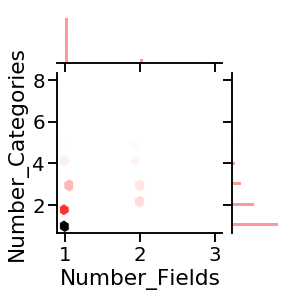

In [96]:

import seaborn as sns
joint_kws=dict(gridsize=17)
g = sns.jointplot("Number_Fields", "Number_Categories", data=important_cols, kind="hex",color="r",height=4, ratio=3, joint_kws= joint_kws)

#g = sns.jointplot(x="total_bill", y="tip", data=tips,kind="hex")                                           
                                                   

Concluimos entonces que es un set de datos bastante consistente, por lo menos en lo que respecta a la mayoría de las variables estudiadas. La excepción es la variable número de autores, donde dada  la naturaleza de los campos estudiados, existen colaboraciones masivas y el número de autores es alto respecto a otras ramas de la ciencia.
Por otra parte, se observa que los articulos en su mayoria, son asignados a pocas categoria dentro de los 3 grandes campos de estudio del dataset.